<a href="https://colab.research.google.com/github/dalatorrem/Diplomado_Metodos_UCentral_2023/blob/main/Lectura_24_Linear_Regression_Part_II_stud_mod_clas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

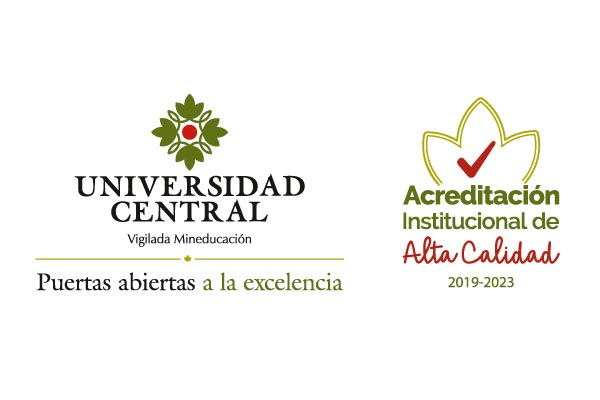

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import statsmodels.formula.api as smf

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (15,6)
warnings.filterwarnings("ignore")
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"

# ***Regresión lineal múltiple.***

En una regresión múltiple se tiene una variable objetivo (`Target`) $Y$ la cual es cuantitativa y es de interés para el investigador. Se quiere entonces construir una función $f(X)$ donde $X=(X_1, \ldots, X_p)$ es un conjunto de variables explicativas (`Features`) que se utilizaran para pronosticar y explicar las diferencias presentes en la variable target $Y$.

En un modelo de regresión lineal, se usan las funciones del tipo:
$$Y=\beta_0 +\beta_1X_1+\beta_2X_2+...+\beta_pX_p +\epsilon $$

donde $\epsilon$ se conoce como el error o ruido del modelo.

Sobre este error se realizan varios supuestos para que el modelo tenga validez estadística.
1. ***Normalidad o gaussianidad:*** Campana de Gauss
2. ***Homocedasticidad:*** La variabilidad de mi modelo no depende de las X
3. ***Independencia.***


# ***¿Cómo debemos fijar el precio de inmuebles en Seattle?***



## ***Objetivos.***


En una lectura anterior, aprendimos cómo la regresión lineal puede ser una herramienta poderosa para comprender el comportamiento de una variable de interés en relación con otras variables en nuestro conjunto de datos. Sin embargo, en muchas situaciones de la vida real, es posible que nuestros datos no cumplan con los supuestos básicos que se necesitan para que un modelo de regresión lineal sea adecuado. En los casos en que la regresión lineal no sea *directamente* aplicable, en estos escenarios debemos descubrir cómo solucionar este problema.

Vamos a abordar:

1. Cómo seleccionar y usar las transformaciones de variables apropiadas para corregir nuestros datos de modo que sean adecuados para aplicar la regresión lineal
2. Cómo decidir si las variables independientes adicionales realmente benefician al modelo
3. Cómo ampliar aún más la aplicabilidad de los modelos lineales teniendo en cuenta las interacciones que pueden existir entre las variables independientes

### ***Introducción***

El Dataset se obtuvo de [`Kaggle`](https://www.kaggle.com/harlfoxem/housesalesprediction) e incluye precios de venta de casas en el estado de Washington (condado de King, donde se encuentra Seattle) entre mayo de 2014 y mayo de 2015.

Vamos a crear un modelo que use como variable target el precio de venta (`price`) y  como las features las características de los predios. Todo basado en ventas anteriores en Seattle para recomendar un precio de venta óptimo.


In [2]:
houses = pd.read_csv(url_base + "kc_house_data.csv",)
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## ***Exploración de datos***


Comencemos por revisar las columnas del conjunto de datos y lo que significan:

1. **id**: Identificación para la casa.
2. **date**: Fecha de venta de la casa.
3. **price**: Precio al que se vendió la casa.
4. **bedrooms**: Número de habitaciones.
5. **bathrooms**: Número de baños.
6. **sqft_living**: Pies cuadrados de la casa.
7. **sqft_lot**: Pies cuadrados del lote.
8. **floors**: Total de pisos (niveles) en casa.
9. **waterfront**: Si la casa tiene o no una vista de un al mar.
10. **view**: Un índice de 0 a 4 de qué tan buena es la vista desde la propiedad
11. **condition**: Condición de la casa (que tan buena está).
12. **grade**: Calificación general otorgada a la unidad de vivienda, basada en el sistema de calificación del condado de King.
13. **sqft_above**: Pies cuadrados de la casa en la parte del sótano.
14. **sqft_basement**: Pies cuadrados del sótano.
15. **yr_built**: Año en que se construyó la casa
16. **yr_renovated**: Año en que fué renovada la casa.
17. **zipcode**: Código postal de la casa
18. **lat**: Coordenada de latidad del predio.
19. **long**: Coordenada de longitud del predio.
20. **sqft_living15:** Área de la sala de estar en 2015 (implica: algunas renovaciones) Esto podría o no haber afectado el área del tamaño del lote.
21. **sqft_lot15:** Pies cuadrado del lote (implica algunas revonaciones)

In [3]:
##  Vamos a formar nuestro Dataset de trabajo
df = houses.copy()
df = df.drop(columns = ["id","sqft_living15","sqft_lot15"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
dtypes: flo

### ***Ejercicio 1.***

Esta es la distribución de los precios de la vivienda caracterizada por sus estadísticas descriptivas y un histograma:

In [4]:
df["price"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0


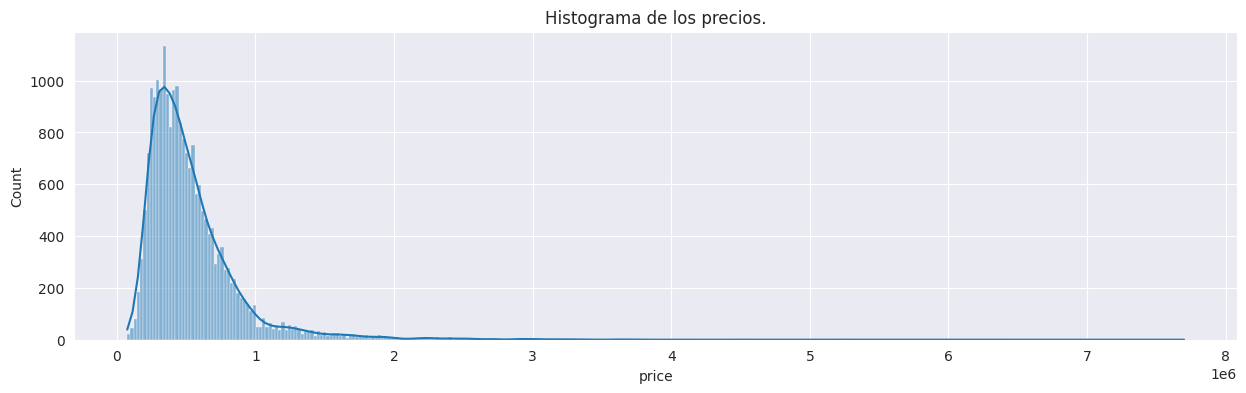

In [5]:
plt.figure(figsize=(15,4))
sns.histplot(df["price"], kde= True)
plt.title("Histograma de los precios.")
plt.show()

Basándose únicamente en estos resultados, ¿diría que la distribución de precios es normal?

***Respuesta.***

---

Del histograma podemos ver que la distribución está bastante sesgada hacia la derecha. Esto se corrobora con el hecho de que la diferencia entre el percentil 25 y el percentil 50 es notablemente menor que la diferencia entre el percentil 50 y el percentil 75. Por lo tanto, es casi seguro que la distribución de precios no es normal.

Una forma de evaluar si los datos provienen de una distribución dada en particular es dibujar un [**Gráfico de cuantil cuantil(QQ-plot)**](https://www.youtube.com/watch?v=okjYjClSjOg&ab_channel=StatQuestwithJoshStarmer) . En un gráfico QQ, los cuantiles de los datos se representan frente a los cuantiles de la distribución deseada. Si la gráfica resultante se desvía lo suficiente de la línea de identidad (es decir, la línea $y = x$), podemos decir que nuestros datos no provienen de esa distribución en particular.

Para entender mejor cómo interpretar gráficos QQ, consideremos una variable normalmente distribuida y encontremos sus percentiles (100 cuantiles):

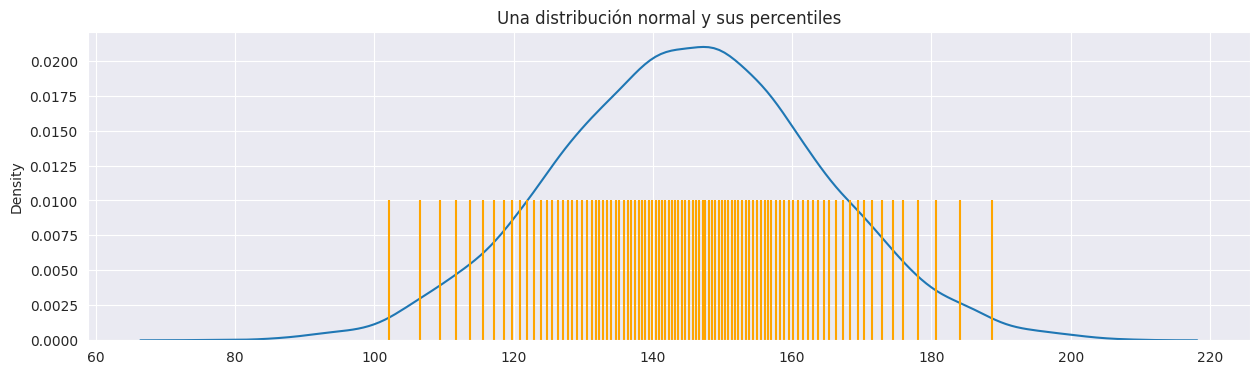

In [6]:
## N(145,19²) encontramos 99 percentiles (0.01-0.99)
np.random.seed(1880)
theor_data = pd.Series(np.random.normal(loc=145, scale=19, size=10000))
percentil_theo = theor_data.quantile([x/100 for x in range(1,100,1)])
##
plt.figure(figsize = (15,4))
sns.kdeplot(x = theor_data)
plt.vlines(percentil_theo, ymin=0, ymax=0.01, color="orange")
plt.title("Una distribución normal y sus percentiles")
plt.show()

Tomemos ahora una muestra de la misma variable. Esta muestra consta de 99 observaciones y, por lo tanto, cada observación cuenta como un percentil (es decir, después de ordenarlas, la $i$-ésima observación será exactamente el $i$-el percentil).



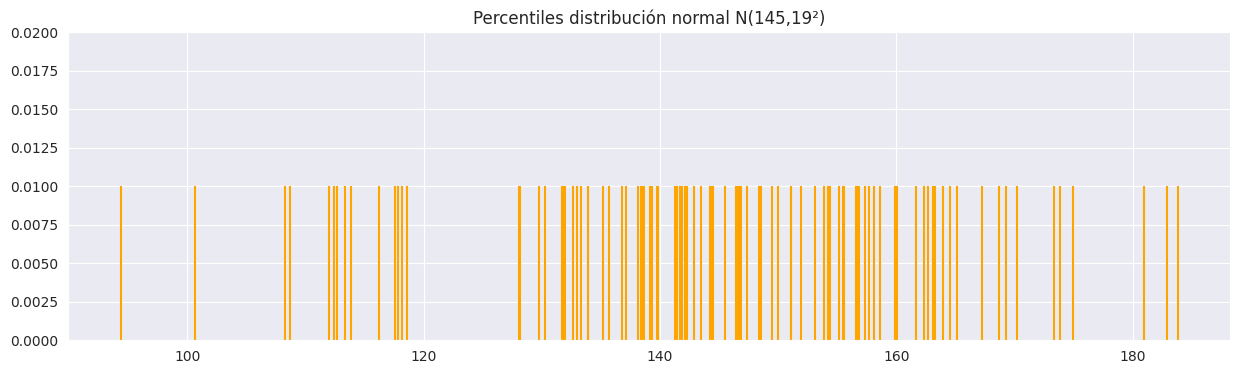

In [7]:
np.random.seed(1880)
percentil_sample = np.sort(np.random.normal(loc=145, scale=19, size=99))
##
plt.figure(figsize = (15,4))
plt.vlines(percentil_sample, ymin=0, ymax=0.01, color="orange")
plt.title("Percentiles distribución normal N(145,19²)")
plt.ylim(0,0.020)
plt.show()

Si graficamos los percentiles de la distribución normal contra los percentiles de la muestra como un diagrama de dispersión, obtenemos lo siguiente:

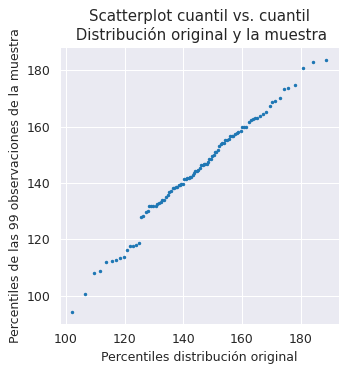

In [40]:
## Gráfico QQ del original frente a la muestra
plt.figure(figsize=(4, 4), dpi=90)
plt.scatter(percentil_theo, percentil_sample, s=3)
plt.xlabel("Percentiles distribución original")
plt.ylabel("Percentiles de las 99 observaciones de la muestra")
plt.title( "Scatterplot cuantil vs. cuantil\n Distribución original y la muestra")
plt.show()


Se observa que los puntos siguen aproximadamente una línea recta desde la esquina inferior izquierda hasta la esquina superior derecha (es decir, aproximadamente la línea $y = x$). Esto tiene sentido: dado que las formas de las distribuciones son similares, sus percentiles (que resumen esas formas) también deberían ser similares.

Ahora comparemos nuestra distribución original con *otra* distribución que también es normal pero que tiene una media y una desviación estándar muy diferentes (observe el cambio en el eje $y$):

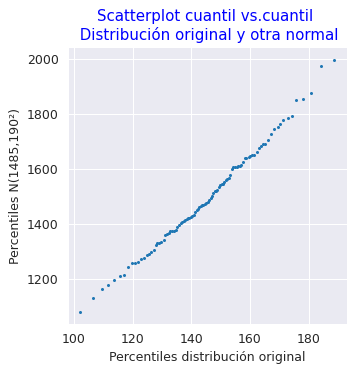

In [41]:
np.random.seed(1000)
sample_data_other = pd.Series(np.random.normal(loc=1485, scale=190, size=100))
sample_data_other = sample_data_other.quantile([x/100 for x in range(1,100,1)])
plt.figure(figsize=(4, 4), dpi=90)
plt.scatter(percentil_theo, sample_data_other, s=2)
plt.xlabel("Percentiles distribución original", fontsize = 10)
plt.ylabel("Percentiles N(1485,190²)", fontsize = 10)
plt.title( "Scatterplot cuantil vs.cuantil \n Distribución original y otra normal", color = "b")
plt.show()

La relación lineal entre los percentiles se mantiene. En general, si dibuja una gráfica QQ de dos variables normales, los puntos tenderán a formar una línea recta incluso si las dos distribuciones tienen medias y desviaciones estándar diferentes.

### ***Pregunta 1.***

Este es el gráfico QQ para `price` frente a la distribución normal estandar. ¿Qué puedes concluir?



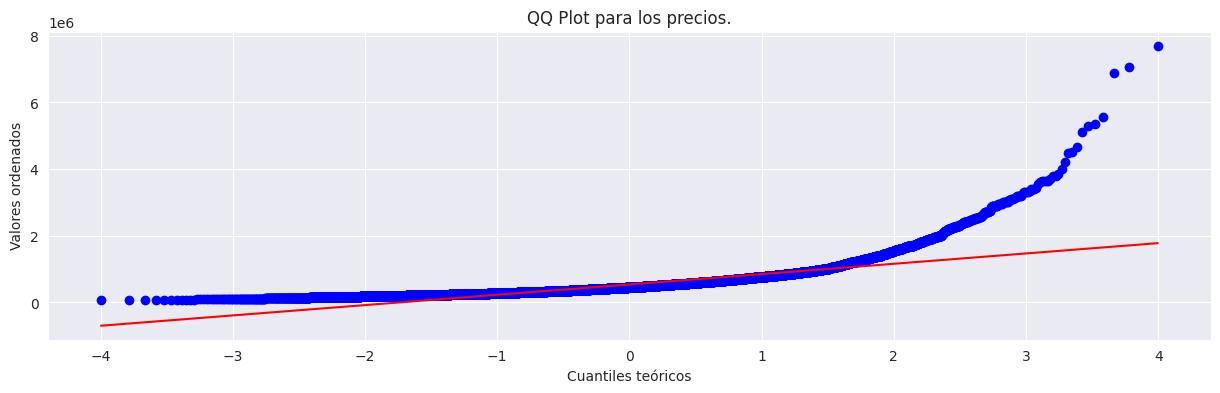

In [42]:
## QQ plot de price
plt.figure(figsize = (15,4))
stats.probplot(x=df["price"], dist="norm", plot=plt) ## QQ-plot.
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Valores ordenados")
plt.title("QQ Plot para los precios.")
plt.show()

Al parecer la distribución de `price` no es normal... Problema!!!! Se necesita en el modelo de regresión múltiple que la variable respuesta se distribuya normal-- :(

### ***Ejercicio 2.***

Examine la relación entre los precios de la vivienda y el precio por pie cuadrado de espacio habitable (gráfico a continuación). ¿Qué puede concluir?

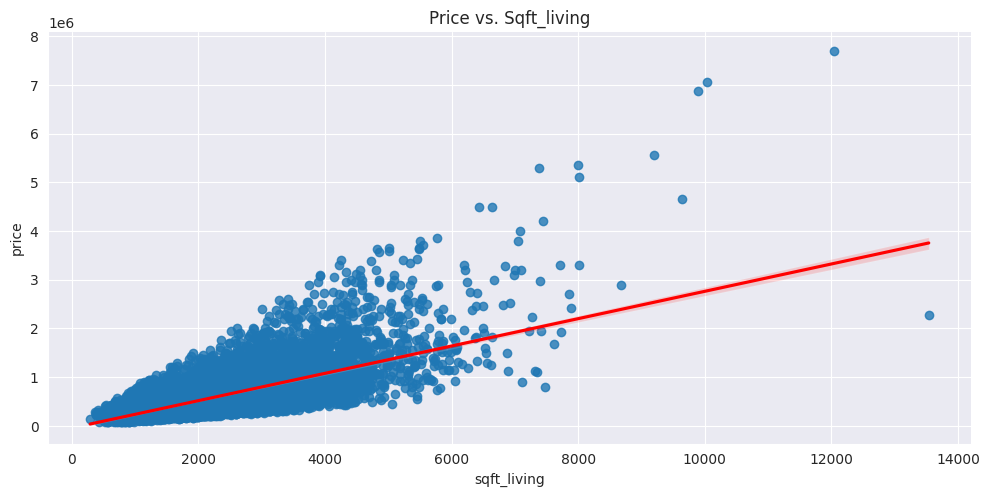

In [11]:
## Relación lineal entre sqft_living y price
sns.lmplot(x="sqft_living", y="price", data=df, line_kws={"color": "red"}, aspect=2)
plt.title("Price vs. Sqft_living")
plt.show()

***Respuesta.***

---

Dada la forma en que el precio de la vivienda frente al precio por pie cuadrado parece "abanicarse", vemos que la relación no parece ser lineal. De hecho, no es inmediatamente obvio qué tipo de relación se exhibe aquí.

### ***Transformación de variables.***</font>


Vimos en el Ejercicio 1 que la distribución de los precios de la vivienda no es normal, y que esto puede estar contribuyendo al efecto de "abanico" que observamos en el Ejercicio 2. Queremos encontrar una manera de eliminar el efecto de "abanico", ya que implica que un ajuste lineal se vuelve cada vez menos adecuado para valores más grandes de `sqft_living`. Un método común para abordar este problema es transformar la variable dependiente y/o la variable independiente. Tal **transformación de variable** implica aplicar una función a una o más de estas variables para lograr condiciones que sean adecuadas para la aplicación de un modelo lineal.

Las funciones matemáticas típicas utilizadas para transformar variables incluyen potencias (cuadráticas, cúbicas, raíces cuadradas, etc.), logaritmos y funciones trigonométricas. Comencemos con la transformación logarítmica en busca de lograr "linealizar" la relación.




### ***Ejercicio 3.***

Tomamos el logaritmo de `price` y al crear las siguientes gráficas y tablas. Determinar si esto hizo que la distribución de la variable transformada fuera más o menos normal.

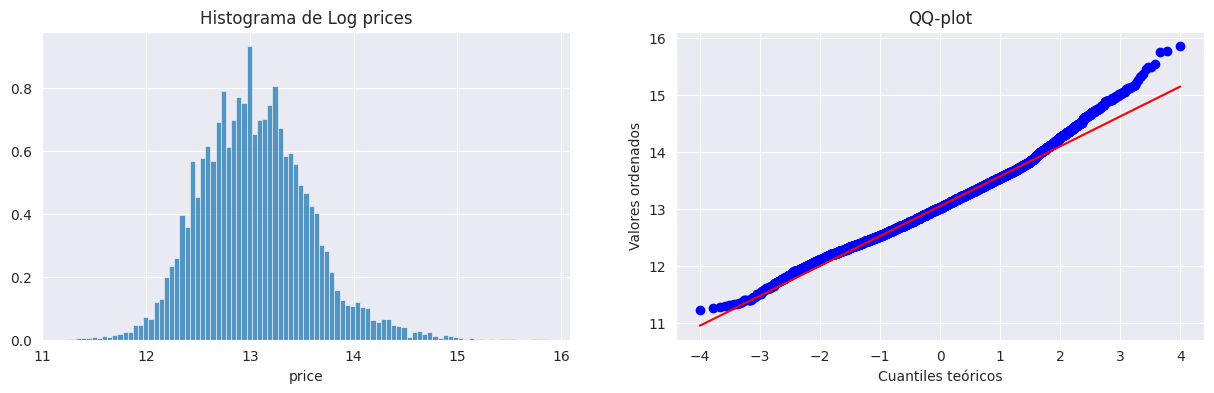

In [43]:
## QQ plot de log(price)
fig, ax = plt.subplots(1,2,figsize = (15,4))
g = sns.histplot(np.log(df["price"]), ax = ax[0], stat = "density")
g.set(title = "Histograma de Log prices", ylabel = "")
stats.probplot(np.log(df["price"]), dist="norm", plot=plt,)
plt.title("QQ-plot")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Valores ordenados")
plt.show()

In [13]:
np.log(df["price"]).describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,13.047817,0.526685,11.225243,12.682152,13.017003,13.377006,15.856731


In [44]:
np.log(10)

2.302585092994046

***Respuesta.***

---

Podemos ver en el gráfico QQ, el histograma y la tabla que la distribución está mucho más cerca de una distribución normal.

### ***Construcción de un modelo lineal con variables transformadas.***

No estamos restringidos a solo aplicar la transformación logarítmica a la variable `price`, podemos hacerlo a cualquier otra variable en nuestro conjunto de datos. Transformemos tanto `price` como `sqft_living` con este método y ajustemos el siguiente modelo lineal:

$$
\log(price) = \beta_0 + \beta_1 \log(sqft{\_}living) + \varepsilon
$$

A continuación se muestra el diagrama y la tabla de salida correspondientes (en esta y en todas las tablas de salida posteriores, cada vez que una variable es una transformación logarítmica, tiene el prefijo `np.log` y aparece entre paréntesis):

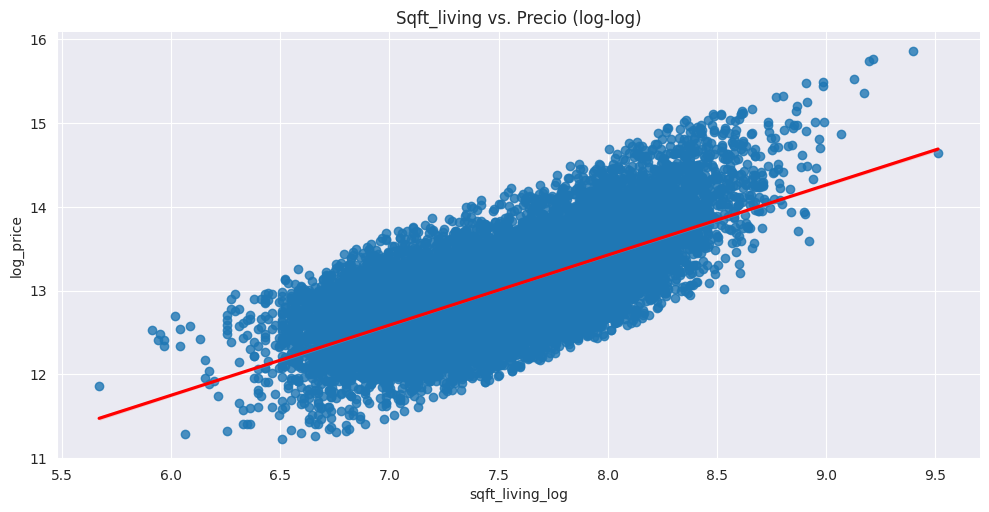

In [45]:
## Relación lineal entre sqft_living and price, creamos un nuevo DataFrame "houses_1"
houses_1 = houses.copy()
houses_1["log_price"] = np.log(houses_1["price"])             ## Nueva variable houses-DataFrame
houses_1["sqft_living_log"] = np.log(houses_1["sqft_living"]) ## Nueva variable houses-DataFrame
##
sns.lmplot( x="sqft_living_log", y="log_price", data = houses_1, line_kws={"color": "red"},
           aspect=2)
plt.title("Sqft_living vs. Precio (log-log)")
plt.show()

In [15]:
formula1 = "np.log(price) ~ np.log(sqft_living)"
log_log_model = smf.ols(formula = formula1, data=df).fit()
print(log_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:10:52   Log-Likelihood:                -10240.
No. Observations:               21613   AIC:                         2.048e+04
Df Residuals:                   21611   BIC:                         2.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.7299    

Tenemos que ser conscientes de cómo interpretamos los coeficientes aquí. En una regresión en la que tanto la variable independiente como la dependiente son transformaciones logarítmicas (una *log-log regression*), el coeficiente $\beta_1$ debe interpretarse como el *cambio porcentual* en la variable dependiente asociada con el 1\% de cambio en la variable independiente. Esta comparación de cambio de porcentaje frente a porcentaje se conoce como **elasticidad**. Así, en nuestro modelo:

---

***Un aumento del 1\% en la superficie habitable se asocia con un aumento del 0,8368\% en el precio.***



---

---

Ahora construyamos un modelo lineal donde la transformación logarítmica solo se aplica a los precios de la vivienda, es decir, un modelo de la forma:
$$
\log(price) = \beta_0 + \beta_1 sqft{\_}living + \varepsilon
$$

El plot y la tabla de salida están a continuación:


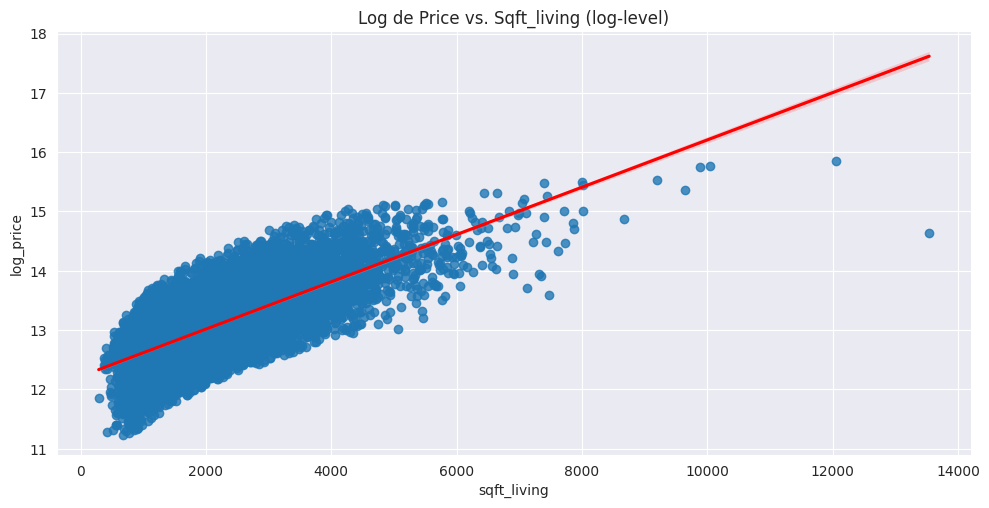

In [46]:
## Relación lineal entre sqft_living y precio (log-level)
sns.lmplot(x="sqft_living", y="log_price", data = houses_1, line_kws={"color": "red"}, aspect=2)
plt.title("Log de Price vs. Sqft_living (log-level)")
plt.show()

In [47]:
formula2 = "np.log(price) ~ sqft_living"
log_level = smf.ols(formula = formula2, data=df).fit()
print(log_level.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.023e+04
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:48:36   Log-Likelihood:                -9670.2
No. Observations:               21613   AIC:                         1.934e+04
Df Residuals:                   21611   BIC:                         1.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2185      0.006   1916.883      

La interpretación del coeficiente de regresión vuelve a ser diferente. Esta es una *log-level regression*; es decir, uno en el que la variable dependiente se ha transformado logarítmicamente y la variable independiente no. Interpretamos el coeficiente como una **semi-elasticidad**, donde un aumento absoluto en `sqft_living` (porque no se le ha aplicado la función logarítmica) corresponde a un aumento porcentual en `price`. Específicamente, aquí podemos decir que:

---

***Un aumento en el espacio habitable de 1 pie cuadrado conduce a un aumento del 0,04 % en el precio.***

---

### ***Ejercicio 4.***

De las gráficas de los modelos log-log y log-level, ¿cuál de los dos es "más lineal"?


***Respuesta.***

---

Podemos ver en estos gráficos que los puntos de datos del modelo log-log se agrupan más uniformemente alrededor de la línea de mejor ajuste en diferentes niveles de la variable independiente en comparación con el otro modelo, lo que sugiere que el modelo log-log es más lineal.

### ***La transformación Box-Cox.***

Las transformaciones logarítmicas son solo una posible transformación para hacer que nuestras relaciones sean más lineales. Anteriormente, mencionamos potencias (por ejemplo, cuadrados, cubos, raíces cuadradas, etc.), así como funciones trigonométricas. En algunos casos, elegir una transformación puede ser sencillo (por ejemplo, el logaritmo porque es fácilmente interpretable); otras veces, es mucho más difícil. Una manera formal de decidir qué transformación es usar  la transformación de [**Box-Cox**](https://www.isixsigma.com/tools-templates/normality/making-data-normal-using-box-cox-power-transformation/) criterio. Esta es una ingeniosa función matemática que genera un número cuando lo aplicas a una variable. Este número suele representarse con la letra griega $\lambda$ (lambda). La interpretación de algunos valores comunes de $\lambda$ se muestra a continuación:



| Si se obtiene un valor lambda ($λ$) de... 	| entonces transformamos $Y$ usando esta función|
|-	|-	|
| -3 	| $Y^{-3} = \frac{1}{Y^3}$ 	|
| -2 	| $Y^{-2} = \frac{1}{Y^2}$	|
| -1 	| $Y^{-1} = \frac{1}{Y^1}$ 	|
| -0.5 	| $Y^{-0.5} = \frac{1}{Y^{0.5}} = \frac{1}{\sqrt{Y}}$ 	|
| 0 	| $log(Y)$ 	|
| 0.5 	| $Y^{0.5} = \sqrt{Y}$ 	|
| 1 	| $Y^1 = Y$ 	|
| 2 	| $Y^2$ 	|
| 3 	| $Y^3$ 	|


Por ejemplo, si tiene una variable $Y$ y obtuvo $\lambda=2$ después de aplicar la función Box-Cox, entonces $Y^2$ debería tener una distribución aproximadamente normal. Como caso especial, cuando $\lambda=0$ no transformamos usando $Y^0$ (que le daría el número constante 1), sino usando $\log(Y)$.

***Para la transformación realizada por stats.boxcox revise https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html***

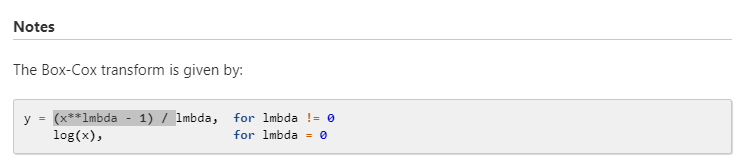

En `Python` procedemos así:

In [48]:
stats.boxcox(df["price"])

(array([4.0334758 , 4.07834265, 4.02144527, ..., 4.06460556, 4.06434971,
        4.05395248]),
 -0.23401853749997595)

In [49]:
transformed_price, lambda_price = stats.boxcox(df["price"])

Esta es la serie transformada por Box-Cox:

In [20]:
transformed_price

array([4.0334758 , 4.07834265, 4.02144527, ..., 4.06460556, 4.06434971,
       4.05395248])

0        4.033741
1        4.078618
2        4.021707
3        4.083824
4        4.076165
           ...   
21608    4.059408
21609    4.064622
21610    4.064878
21611    4.064622
21612    4.054222
Name: price, Length: 21613, dtype: float64

In [60]:
transformed_price

array([4.0334758 , 4.07834265, 4.02144527, ..., 4.06460556, 4.06434971,
       4.05395248])

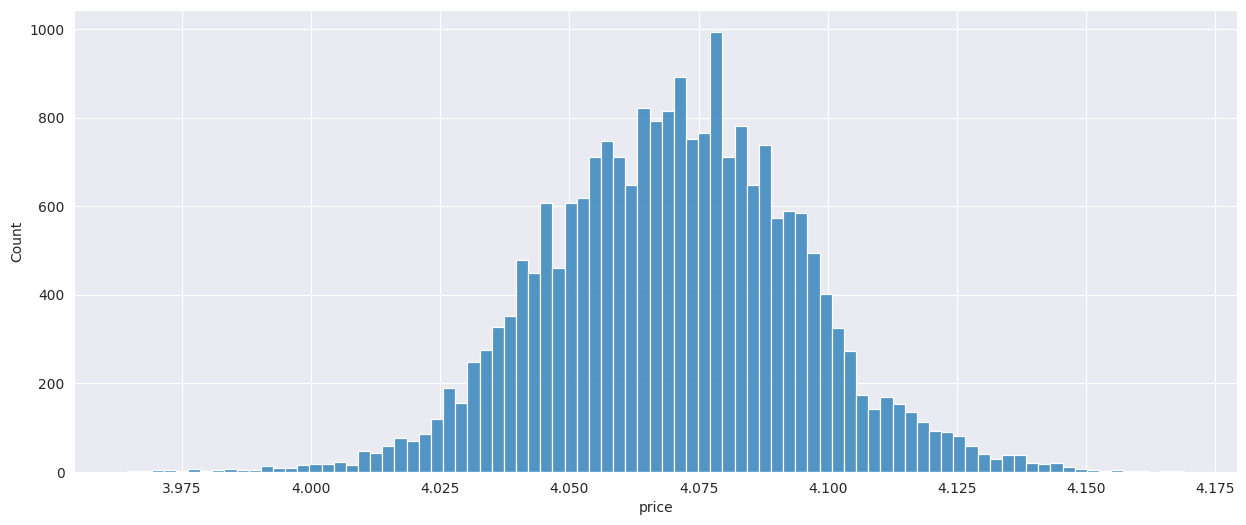

In [64]:
## Histograma de los valores transformados por Box-Cox
sns.histplot(x = (df["price"]**-0.2340-1)/-0.2340)
plt.show()

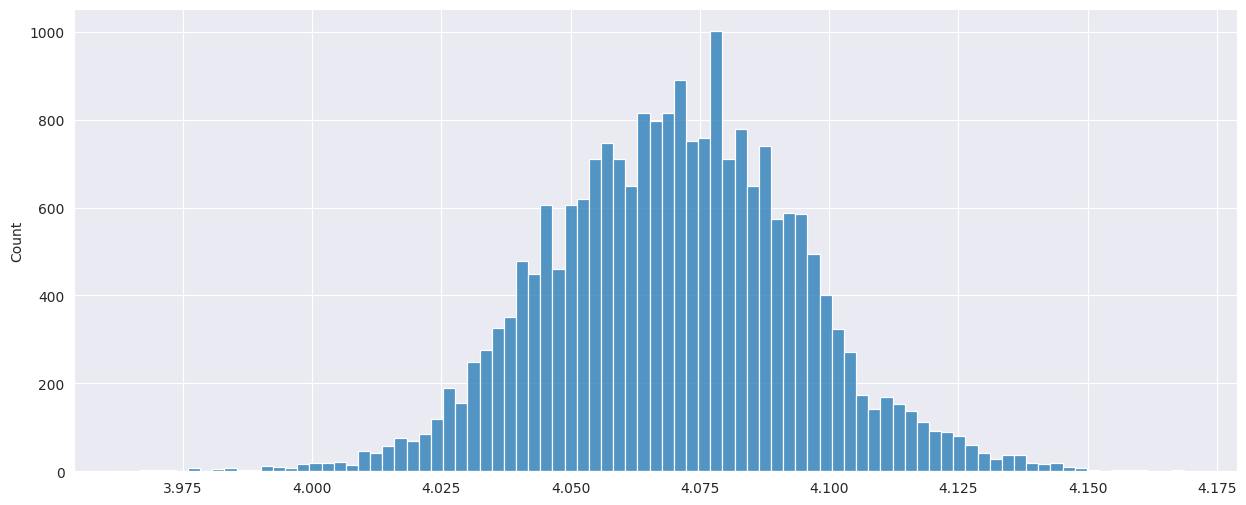

In [50]:
## Histograma de los valores transformados por Box-Cox
sns.histplot(x = transformed_price)
plt.show()

Y este es el $\lambda$:

In [66]:
print("El valor de lambda en Box-Cox es: ", round(lambda_price,3))

El valor de lambda en Box-Cox es:  -0.234


Tenemos que BC es $\lambda=-0.23$, por lo que parece sensato usar la transformación logarítmica ya que el valor de Box-Cox es cercano a cero. Aunque es muy útil, el criterio de Box-Cox no es perfecto, por lo que siempre debe verificar el QQ-plot después de transformar la variable para confirmar que parece tener una distribución normal.

### ***Regresión lineal múltiple con variables transformadas.***

Por supuesto, no tiene sentido limitarnos a modelar los precios de la vivienda usando solo una variable independiente. Agreguemos varias variables más, algunas transformadas y otras no.

### ***Ejercicio 5.***



A continuación se muestra la tabla de salida del siguiente modelo:

$$
\log(price) = \beta_0 + \beta_1 \log(sqft{\_}living) + \beta_2 \log(sqft{\_}lot) + \beta_3 bedrooms + \beta_4 floors + \beta_5 bathrooms + \beta_6 waterfront + \beta_7 condition + \beta_8 view + \beta_9 grade + \beta_{10} yr{\_}built + \beta_{11} lat + \beta_{12} long + \varepsilon
$$

Proporcionar interpretaciones para el coeficiente de log `sqft_living`, y `waterfront`.

**Nota:** Las variables de este modelo que son categóricas aparecen en la tabla entre paréntesis y después de una letra `C` que significa "categórica". Esta sintaxis proviene de la libreria de software que usamos para ajustar el modelo.



In [67]:
df["waterfront"] = df["waterfront"].astype("category")

In [68]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [69]:
prueba = smf.ols("np.log(price)~np.log(sqft_living)+C(waterfront)",df).fit()
print(prueba.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     9592.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:14:40   Log-Likelihood:                -9943.7
No. Observations:               21613   AIC:                         1.989e+04
Df Residuals:                   21610   BIC:                         1.992e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.8148    

In [70]:
formula3 = """np.log(price) ~ np.log(sqft_living)+np.log(sqft_lot)+bedrooms+floors+bathrooms+
             C(waterfront)+condition+C(view)+grade+yr_built+lat+long"""
model3 = smf.ols(formula = formula3, data = df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     4638.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:15:37   Log-Likelihood:                -1246.2
No. Observations:               21613   AIC:                             2524.
Df Residuals:                   21597   BIC:                             2652.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -38.9925    

In [71]:
df['lat']

0        47.5112
1        47.7210
2        47.7379
3        47.5208
4        47.6168
          ...   
21608    47.6993
21609    47.5107
21610    47.5944
21611    47.5345
21612    47.5941
Name: lat, Length: 21613, dtype: float64

***Respuesta.***

---

Todas las variables son estadísticamente significativas (todas $p$ - valores menores a 0.05). En general, este modelo lineal explica más del 76 por ciento de la variabilidad total de la variable dependiente.

Un aumento del 1\% en el espacio habitable conduce a un aumento del 0,4067\% en el precio. Una propiedad con vista al agua generalmente tiene un precio de 39.95\% más que una sin tal vista.
    
Note que nuestro modelo establece que por cada dormitorio adicional, el precio de una casa *disminuye* $2,5\%$. Esto parece una tontería: revisaremos por qué esto probablemente sucedió más adelante.

Un aumento de 1 grado en la latitud corresponde a un aumento del 1.3437\% en el precio.



¿Qué otros factores que omitimos podrían afectar el precio? Los ejemplos pueden incluir la proximidad a los servicios (hospitales, escuelas, áreas comerciales, cines, paradas de metro, etc.) y las tasas de criminalidad. Nuestro conjunto de datos no tiene una lista completa de posibles factores; sin embargo, tenemos algunas variables que sería interesante investigar más a fondo.

En general, los precios de la vivienda cambian según la ubicación. Dos casas con características comparables pueden tener un precio muy diferente según el vecindario y la posición geográfica. En este conjunto de datos, tenemos código postal y coordenadas geográficas. Empecemos echando un vistazo a la relación entre latitud y precios.

### ***Ejercicio 6.***

En el siguiente gráfico, podemos ver la relación entre la latitud y el logaritmo de los precios de la vivienda. ¿Qué observas? ¿Qué función de transformación podría ser apropiada aquí?

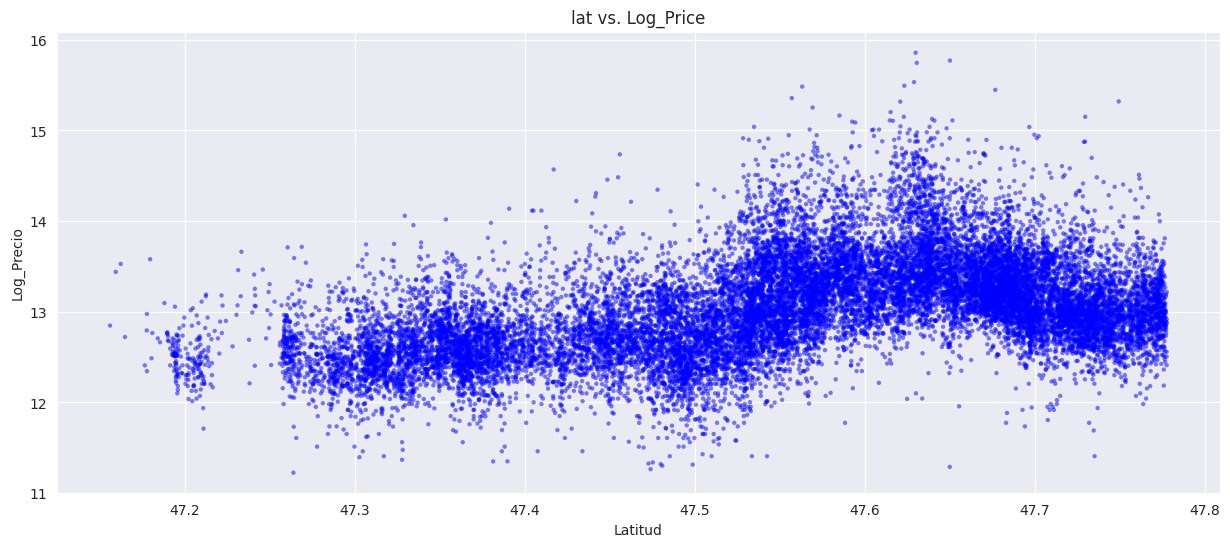

In [72]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(df["lat"], np.log(df["price"]), c="b", alpha=0.5, edgecolors="none", s=10)
plt.xlabel("Latitud")
plt.ylabel("Log_Precio")
ax.set_title("lat vs. Log_Price")
plt.show()

***Respuesta.***

---
Podemos ver que existe una relación no lineal entre la latitud y el precio. Basado en la curvatura cóncava en la mitad derecha de la gráfica anterior, parece que agregar un término cuadrático podría ayudarnos a explicar esto.

Agreguemos el cuadrado de la latitud como una variable independiente adicional al modelo del Ejercicio 5:

In [73]:
formula4 = formula3 + "+I(lat**2)"
model4 = smf.ols(formula = formula4, data=df).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     4741.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:27:28   Log-Likelihood:                -525.85
No. Observations:               21613   AIC:                             1086.
Df Residuals:                   21596   BIC:                             1221.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -7714.7455    

### ***Pregunta 2.***

¿Es significativo el coeficiente de esta nueva variable independiente? ¿Qué puedes decir sobre el $R^2$ de este modelo? (el coeficiente relevante en la tabla de salida es el de la variable `I(lat**2)`; esto proviene de la sintaxis de la libreria que usamos para ejecutar la regresión).


### ***Ejercicio 7.***

#### ***7.1***

Una de las propiedades de $R^2$ es que nunca puede disminuir cuando aumenta el conjunto de predictores. En otras palabras, no hay penalización por continuar agregando variables al modelo. ¿Por qué crees que esto puede ser un inconveniente de $R^2$? ¿Cómo haría para decidir el conjunto correcto de predictores a utilizar?



***Respuesta.***

---

Dado que no hay penalización por continuar agregando variables, podemos terminar usando variables que tienen poco poder explicativo. En consecuencia, seleccionar variables independientes con el único propósito de maximizar $R^2$ puede llevar a elegir modelos innecesariamente complejos y redundantes. Esto puede llevarnos a un **overfitting**; es decir, adaptar el modelo tanto a los datos particulares que tenemos a expensas de generalizar bien a otros datos que no tenemos.
Una forma de evitar el sobreajuste es implementar una medida que imponga una penalización por cada variable independiente agregada. Esta es $R²_{adj}$, pues penaliza el ingreso de nuevos parámetros, él solo aumentará si se reduce la varianza estimada del modelo.

#### ***7.2***

Existen varios criterios de selección de modelos que cuantifican la calidad de un modelo mediante la gestión del equilibrio entre la bondad de ajuste y la simplicidad. El más común es el **AIC (Criterio de información de Akaike)**. El AIC penaliza la adición de más términos a un modelo, por lo que para que un modelo actualizado tenga un mejor AIC, su $R^2$ debe mejorar al menos tanto como la penalización adicional impuesta. Dados varios modelos, el que tiene **el AIC más bajo es el recomendado.**

Por ahora, no se preocupe por los detalles técnicos detrás de AIC (puede leer más sobre esto [aquí](https://en.wikipedia.org/wiki/Akaike_information_criterion)).

Utilice la puntuación AIC (puede buscarla en la tabla de salida del resumen del modelo) para evaluar si el modelo con el término cuadrado agregado es mejor o no que el modelo sin él.

***Respuesta.***

---

Comparando este modelo con el anterior podemos ver que el AIC ha mejorado de ~2597 a ~1086. Por lo tanto, es preferible el modelo con el término al cuadrado.


### ***Modelado de efectos de interacción.***

Los efectos de interacción pueden complicar el efecto percibido de las variables independientes sobre la variable dependiente. Profundicemos en las interacciones potenciales observando dos de los predictores en tándem: `waterfront` y posición geográfica (`lat` and `long`). Específicamente, ¿el efecto de la posición geográfica es diferente entre las casas que tienen vista frente al mar y las que no?

### ***Ejercicio 8.***

#### ***8.1***

A continuación, dibujadomos un gráfico de la relación entre `log_price` y `lat`. Este gráfico se ajusta a dos líneas de regresión separadas para las casas que tienen y no tienen una vista `waterfront`. ¿Que ves? ¿La relación es igual o diferente?

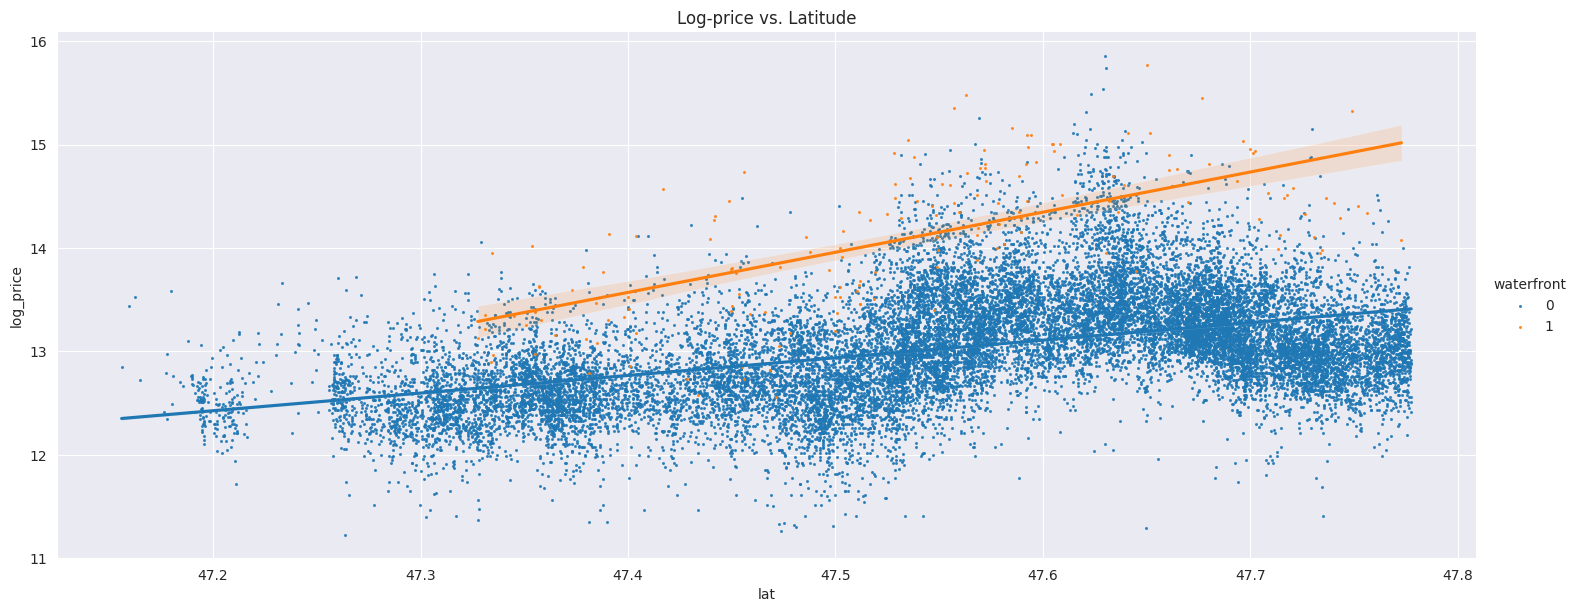

In [28]:
sns.lmplot(x="lat", y="log_price", data=houses_1, hue="waterfront", height=6, aspect = 2.5,
           scatter_kws={"s": 1.5})
plt.title("Log-price vs. Latitude")
plt.show()

***Respuesta.***

---
Vemos que los efectos de la posición geográfica son más pronunciados para el subgrupo de casas con vista al mar. En otras palabras, la línea tiene una pendiente más pronunciada y, por lo tanto, por cada grado de incremento en la latitud, el precio aumentará a una tasa más alta para las casas con vista al mar que para las casas sin ella.

#### ***8.2***

Esta es una gráfica que se ajusta a líneas de regresión separadas para casas con diferentes índices de `view` (es decir, qué tan buena era la vista de la propiedad). ¿Que ves? ¿La relación es igual o diferente?

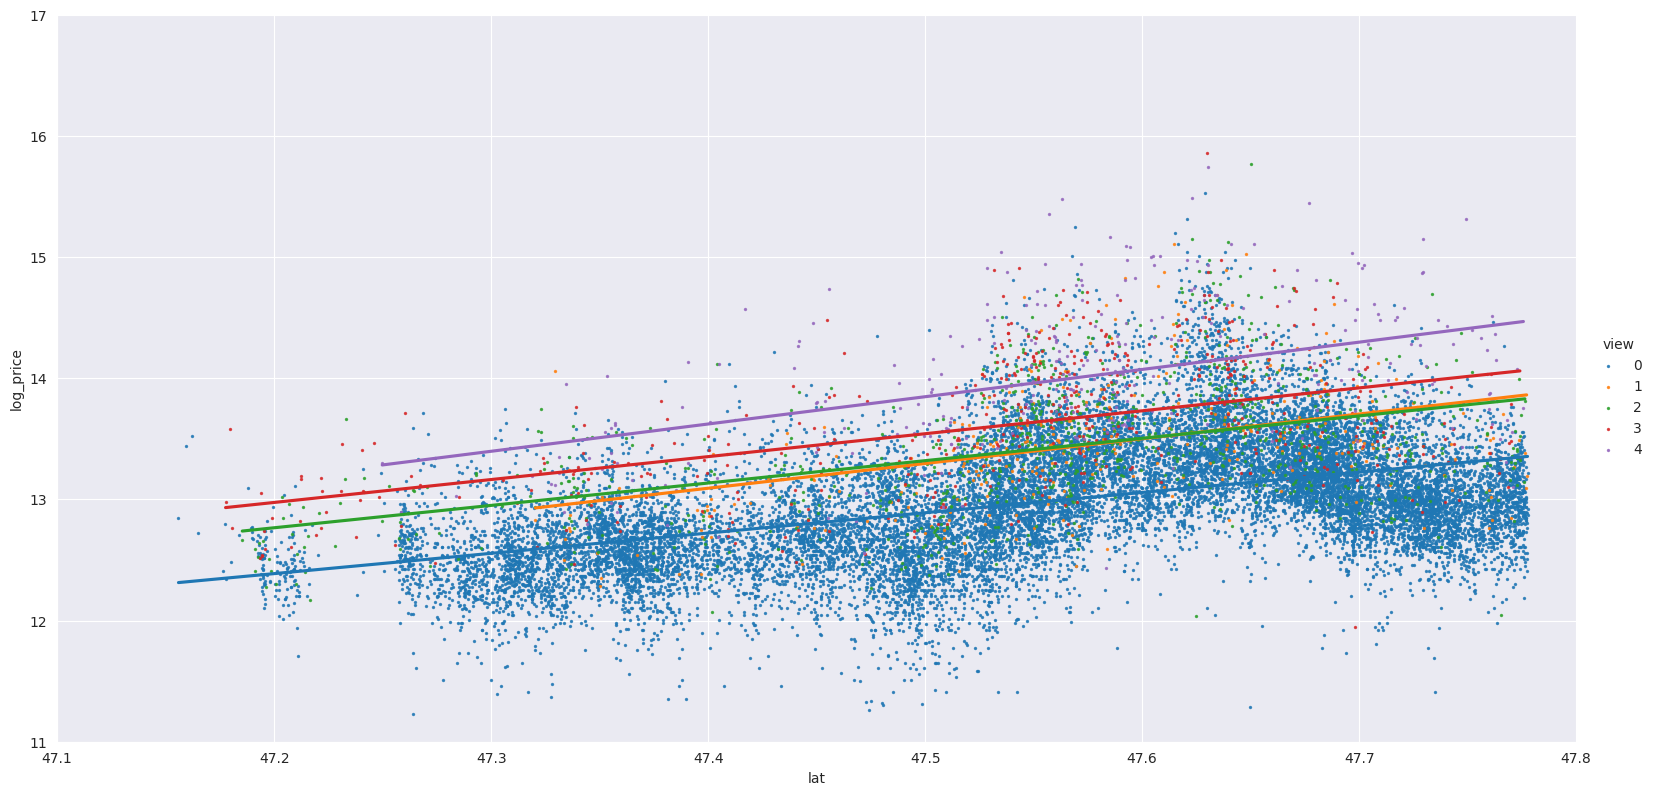

In [29]:
lm = sns.lmplot(x="lat", y="log_price", data=houses_1, hue="view", height=8, scatter_kws={"s": 2},
                facet_kws = {"sharex": False, "sharey": False}, ci=None, aspect = 2)
axes = lm.axes
axes[0,0].set_ylim(11, 17)
axes[0,0].set_xlim(47.1, 47.8)
plt.show()

***Respuesta.***

---
Vemos que las casas con mejores índices de vista tienden a tener precios más altos. Sin embargo, las pendientes de las diferentes líneas de regresión parecen casi iguales. Por lo tanto, un grado de incremento en `lat` aumenta el precio de una casa a (casi) la misma tasa, independientemente de cuán buena sea la `view` de la casa. Por lo tanto, concluimos que la vista de la casa probablemente *no* interactúa con la relación entre el precio y la latitud.


Podemos verificar los hallazgos del Ejercicio 8 agregando **términos de interacción** a nuestro modelo lineal. Los sumamos incluyendo una multiplicación en el modelo. Por ejemplo, el siguiente modelo incluye un término de interacción entre `lat` y `waterfront`:


$$
\log(price) = \beta_0 + \beta_1 waterfront + \beta_2 lat + \beta_3 (lat \times waterfront) + \varepsilon
$$

Para entender por qué incluimos términos de interacción de esta manera, supongamos un modelo lineal (este ejemplo se tomó de [este enlace](https://stats.stackexchange.com/a/486147/86081)):

$$
y=\beta_0+\beta_1 x_1+\gamma x_2+e
$$

donde $\gamma$ depende linealmente de $x_1$:

$$
\gamma = \beta_2+\beta_3 x_1
$$

Esto significa que el efecto de $x_2$ que ves en $y$ no solo depende del valor de $x_2$ sino también del valor de $x_1$. Ambas variables están interactuando. Si sustituimos esta ecuación en la anterior, obtenemos nuestro término de interacción multiplicativa:

$$\begin{align}
y&=\beta_0+\beta_1 x_1 + (\beta_2+\beta_3 x_1)x_2+e\\
&=\beta_0 + \beta_1 x_1 + \beta_2 x_2+\beta_3 x_1x_2+e
\end{align}
$$

Esta es la tabla de salida que corresponde a este modelo:



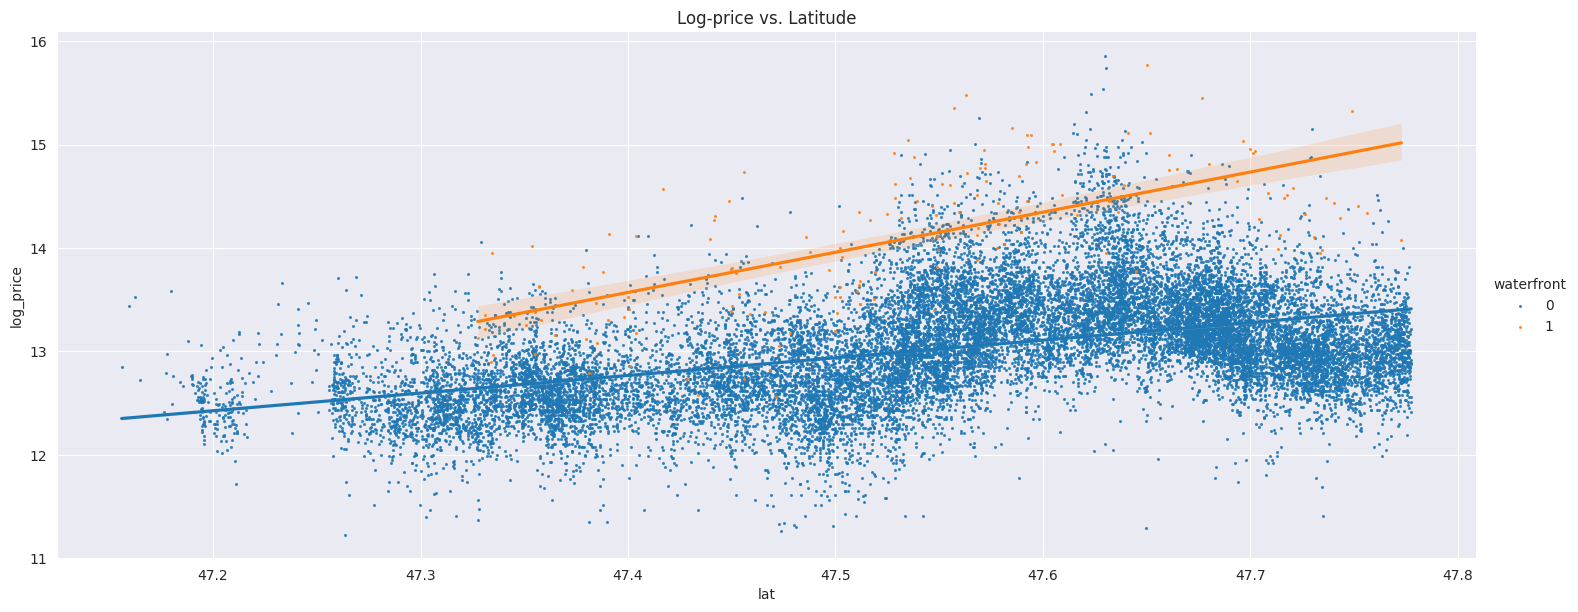

In [74]:
sns.lmplot(x="lat", y="log_price", data=houses_1, hue="waterfront", height=6, aspect = 2.5,
           scatter_kws={"s": 1.5})
plt.title("Log-price vs. Latitude")
plt.show()

In [79]:
model4.mse_resid

0.06151773509562532

In [77]:
modelo5.mse_resid

0.21189809416145416

In [76]:
formula5 = "np.log(price) ~ lat*C(waterfront)"
modelo5 = smf.ols(formula = formula5, data=df).fit()
print(modelo5.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     2228.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:48:01   Log-Likelihood:                -13898.
No. Observations:               21613   AIC:                         2.780e+04
Df Residuals:                   21609   BIC:                         2.784e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -68

La forma en que leemos el efecto de interacción dado por este resumen es la siguiente:
    
1. `C(waterfront)[T.1]`: El modelo establece que se debe hacer un ajuste de $10230\%$ (algo que parece no real) al precio de una casa con vista al mar. Vimos antes que `waterfront` tuvo un impacto positivo en el precio de la casa, sin embargo, nuestro modelo probablemente está dando más peso a otros factores. Sin embargo, este ajuste haría que el precio fuera negativo (!), lo que es una indicación de que el modelo necesita ser refinado.

2. `lat`: Por cada incremento de 0.1 en la latitud el precio de la casa debería aumentar en $17.058\%$ entre las casas que ***NO tienen frente (o vista) al mar.***

  **Nota:** En este caso el valor de la variable  `waterfront` es 0, luego hablamos de los cambios DENTRO de dicho grupo.

3. `lat:C(waterfront)[T.1]` Por cada 0.1 de incremento en la latitud, el precio de la casa debería aumentar por $17.058\% + 21.753\% = 38.8\%$ entre las casas que ***SÍ tienen frente al mar***

  **Nota:** En este caso el valor de la variable `waterfront` es 1, luego hablamos de los cambios DENTRO de dicho grupo.

In [100]:
df_prueba_c0 = df.sample(2, random_state=1)


df_prueba_c1 = df.query('waterfront==1').sample(2, random_state=1)
df_prueba = pd.concat([df_prueba_c0, df_prueba_c1], axis=0)
df_prueba

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,has_basement
15544,20141009T000000,459000.0,4,2.75,2790,6600,2.0,0,0,3,9,2790,0,2000,0,98058,47.4362,-122.109,False,0.0
17454,20150401T000000,445000.0,3,2.25,1630,6449,1.0,0,0,3,7,1310,320,1986,0,98011,47.7275,-122.232,False,1.0
4635,20141111T000000,2485000.0,4,2.50,3440,23954,1.5,1,3,5,10,2260,1180,1931,0,98040,47.5636,-122.231,False,1.0
5666,20150128T000000,1600000.0,3,2.50,2850,19593,1.5,1,4,3,10,1790,1060,1978,0,98008,47.5894,-122.111,False,1.0


In [110]:
round(modelo5.predict(df_prueba),3)

15544    12.828
17454    13.325
4635     14.204
5666     14.305
dtype: float64

In [116]:
# 17454
lat = 47.7275
c = 0
round(-68.0880  + 1.7058*(lat),3)

13.326

In [111]:
# 15544
lat = 47.4362
c = 0
round(-68.0880  + 1.7058*(lat),3)

12.829

In [112]:
# 4635
lat = 47.5636
c = 1
round(-68.0880 + -102.3040*(c) + 1.7058*(lat) + 2.1753*lat*c,3)

14.207

**Despúes de factorizar**

In [114]:
# 4635
lat = 47.5636
round((-68.0880 + -102.3040) + (1.7058 + 2.1753)*lat,3)

14.207

In [115]:
# 5666
lat = 47.5894
round((-68.0880 + -102.3040) + (1.7058 + 2.1753)*lat,3)

14.307

### ***Ejercicio 9.***

Ahora, considere un modelo con un término de interacción entre `lat` y `view`. ¿Que ves? ¿Estos resultados concuerdan con sus hallazgos del Ejercicio 8.2?

In [117]:
formula6 = "np.log(price) ~ lat*C(view)"
model6 = smf.ols(formula=formula6, data=df).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     1145.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        01:34:42   Log-Likelihood:                -12593.
No. Observations:               21613   AIC:                         2.521e+04
Df Residuals:                   21603   BIC:                         2.529e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -66.6850      1.053  

In [122]:
df_prueba_view = df.sample(2, random_state=20235)
df_prueba_view

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,has_basement
2377,20140909T000000,437000.0,5,2.00,2190,8316,1.0,0,0,3,7,1390,800,1961,0,98108,47.5488,-122.298,False,1.0
1484,20141230T000000,530000.0,3,0.75,920,20412,1.0,1,2,5,6,920,0,1950,0,98070,47.4781,-122.490,False,0.0


In [123]:
model6.predict(df_prueba_view)

2377    12.972193
1484    13.280083
dtype: float64

In [124]:
#2377 view = 0
-66.6850 + 1.6753*47.5488

12.973504640000002

In [125]:
# 1484    view=2
(-66.6850 + -7.7183)+ (1.6753 + 0.1715)* 47.4781

13.279255079999999

***Respuesta.***

---

La tabla de resumen muestra alguna interacción entre `lat` y `view`; sin embargo, la mayoría de estos *no* son estadísticamente significativos. Hay cierta interacción cuando las casas tienen un índice de `view` de 4 (que también se puede ver mirando la pendiente de la línea morada en el ejercicio 8), pero es razonable decir que hay muy poca evidencia estadística de una interacción entre las variables `lat` y `view`.




### ***Incorporación de efectos de interacción en un modelo lineal.***

Ajustemos un modelo de referencia que incluya todas las otras variables que hemos discutido antes. Además, incorporemos al modelo una variable `zipcode` y una nueva variable `renovated` indicando si la casa fue renovada anteriormente o no:

$$
\log(price) = \beta_0 + \beta_1 \log(sqft{\_}living)+ \beta_2 \log(sqft{\_}lot) + \beta_3 bedrooms + \beta_4 floors + \beta_5 bathrooms + \beta_6 waterfront + \beta_7 condition  + \beta_8 view + \beta_9 grade + \beta_{10} yr{\_}built + \beta_{11} lat + \beta_{12} (lat^2) + \beta_{13}long + \beta_{14}zipcode + \beta_{15}renovated + \varepsilon
$$

La tabla de salida es la siguiente:



In [126]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [33]:
df["renovated"] = df["yr_renovated"] > 0  ## Construcción de una nueva Feature.
##
formula7 = """np.log(price) ~ np.log(sqft_living)+ np.log(sqft_lot) + bedrooms + floors +
              bathrooms+ C(waterfront) + condition  + C(view) + grade + yr_built + lat +
              I(lat**2) + long + C(zipcode)+ C(renovated)"""
model7 = smf.ols(formula=formula7, data=df).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1833.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:11:04   Log-Likelihood:                 6088.4
No. Observations:               21613   AIC:                        -1.200e+04
Df Residuals:                   21526   BIC:                        -1.131e+04
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6003.8719 

Podemos ver que tanto una vista frente al mar como las renovaciones tienen un impacto positivo en el precio. El efecto de una vista frente al mar es ~43.54 por ciento en los precios de viviendas comparables, mientras que el efecto de las renovaciones es ~5.72 por ciento.

---



Hasta ahora, hemos analizado los efectos globales de las variables independientes, independientemente de los valores de las otras variables. Sin embargo, podríamos preguntarnos si el efecto de una vista frente al mar es diferente para las casas que se renovaron recientemente en comparación con las que no lo fueron. Para responder a esta pregunta, necesitamos agregar un término de interacción:


$$
\log(price) = \beta_0 + \beta_1 \log(sqft{\_}living)+ \beta_2 \log(sqft{\_}lot) + \beta_3 bedrooms + \beta_4 floors + \beta_5 bathrooms + \beta_6 waterfront + \beta_7 condition  + \beta_8 view + \beta_9 grade + \beta_{10} yr{\_}built + \beta_{11} lat + \beta_{12} (lat^2) + \beta_{13}long + \beta_{14}zipcode + \beta_{15}renovated + \beta_{16} (waterfront \times renovated)+ \varepsilon
$$



In [34]:
formula8 = """np.log(price) ~ np.log(sqft_living) + np.log(sqft_lot) + bedrooms +
              floors + bathrooms + C(waterfront) + condition + C(view) + grade +
              yr_built + lat + I(lat**2) + long + C(zipcode) + C(renovated) +
              C(waterfront)*C(renovated)"""
model8 = smf.ols(formula=formula8, data=df).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1812.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:11:05   Log-Likelihood:                 6092.2
No. Observations:               21613   AIC:                        -1.201e+04
Df Residuals:                   21525   BIC:                        -1.131e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Parece haber un pequeño efecto diferencial entre las propiedades con frente al mar que se renovaron frente a las que no se renovaron ($\beta_{16}=-0,0923$).

Incorporación de efectos de interacción en un modelo lineal

### ***Modelo de referencia.***

Consideremos el siguiente modelo de referencia.

In [35]:
## Modelo de referencia
formula_ref = """np.log(price) ~ np.log(sqft_living)*C(renovated) + np.log(sqft_lot) + bedrooms
                  + floors + bathrooms + condition + C(view) + grade + yr_built +
                  lat*C(waterfront) + I(lat**2) + long + C(zipcode)"""
model_ref = smf.ols(formula=formula_ref, data=df).fit()
print(model_ref.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1795.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:11:05   Log-Likelihood:                 6111.7
No. Observations:               21613   AIC:                        -1.205e+04
Df Residuals:                   21524   BIC:                        -1.134e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [36]:
print("AIC:",model_ref.aic, "  R²_adj:", model_ref.rsquared_adj)

AIC: -12045.342504166438   R²_adj: 0.8796075779460023


### ***Ejercicio 10.***

El AIC para el modelo de referencia fue de $-12045,34$ y el $R^2_{adj}$ fue de $0,8796$. Expandamos el modelo haciendo lo siguiente:

1. Agregar un término que represente el cuadrado del año en que se construyó la casa.
2. Agregar un término de interacción para la presencia de un sótano que afecta la relación entre la coordenada de longitud y el precio de una casa.

A continuación se muestran las tablas de salida. Compare el ajuste y el AIC de estos modelos entre sí y con el modelo anterior. ¿Cuál es el mejor modelo?

---
Aquí está la tabla para el modelo con $\beta_{17}(yr{\_}built^2)$  adicional:

In [37]:
formula9 = formula_ref + "+ I(yr_built**2)"
model9 = smf.ols(formula=formula9, data=df).fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1840.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:11:06   Log-Likelihood:                 6454.8
No. Observations:               21613   AIC:                        -1.273e+04
Df Residuals:                   21523   BIC:                        -1.201e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Tabla con un $\beta_{17}$ adicional (has_basement×long) (sin el término de año al cuadrado):

In [38]:
df["has_basement"] = (df["sqft_basement"] > 0) * 1.0
formula10 = formula_ref + "+ has_basement * long"
model10 = smf.ols(formula=formula10, data=df).fit()
print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1776.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:11:06   Log-Likelihood:                 6224.2
No. Observations:               21613   AIC:                        -1.227e+04
Df Residuals:                   21522   BIC:                        -1.154e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

***Respuesta.***

---

Los efectos son significativos en ambos casos. Ambos modelos mejoran el ajuste de nuestro modelo de referencia, pero la adición de un término cuadrático para el año de construcción conduce a un AIC más bajo y un R-cuadrado más alto ($R^2=0.884, AIC=-12729.5$) en comparación con la interacción entre sótano y longitud ($R^2=0.881, AIC=-12266$). Esto indica que el mejor modelo en comparación es el que tiene el término año al cuadrado agregado.



In [39]:
print(f'Modelo de referencia: ---> AIC: {model_ref.aic}')
print(f'Modelo 9              ---> AIC: {model9.aic}')
print(f'Modelo 10             ---> AIC: {model10.aic}')

Modelo de referencia: ---> AIC: -12045.342504166438
Modelo 9              ---> AIC: -12729.581451884478
Modelo 10             ---> AIC: -12266.43053132976


# Modelo con variables construidas y de fácil interpretabildiad

In [128]:
df['zipcode_1_tercera_pos'] = [str(x)[2] for x in df['zipcode']]
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,has_basement,zipcode_1_tercera_pos
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,False,0.0,1
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,True,1.0,1
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,False,0.0,0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,False,1.0,1
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,False,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,False,0.0,1
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,False,0.0,1
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,False,0.0,1
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,False,0.0,0


In [130]:
formula_mod_cla = """np.log(price) ~ np.log(sqft_living) + np.log(sqft_lot) + bedrooms +
              floors + bathrooms + C(waterfront) + condition + C(view) + grade +
              yr_built  + C(zipcode_1_tercera_pos) """
model_class = smf.ols(formula=formula_mod_cla, data=df).fit()
print(model_class.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     2954.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:04:07   Log-Likelihood:                -5248.6
No. Observations:               21613   AIC:                         1.053e+04
Df Residuals:                   21598   BIC:                         1.065e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## ***Conclusiones.***</font>


En esta lectura, aplicamos varios tipos de transformaciones a las variables independientes y dependientes para mejorar la calidad de nuestro modelo lineal. En particular, encontramos que ajustar el logaritmo de los precios de la vivienda nos permitió obtener mejores resultados. Usando nuestra comprensión de las transformaciones, pudimos modelar efectivamente relaciones no lineales, como la relación cuadrática entre la latitud y el logaritmo del precio. Finalmente, integramos nuestra comprensión de los efectos de interacción de vistos en el EDA para modelar y cuantificar directamente las interacciones de la renovación y el waterfront en la relación entre los pies cuadrados y el precio.



## ***Comentarios finales.***

Las transformaciones de variables son una técnica poderosa para mejorar la calidad de nuestros modelos lineales. En particular:

1. La transformación de la variable dependiente puede mejorar la linealidad y resolver el problema de la varianza **no constante** alrededor de la línea de mejor ajuste.
2. La transformación de las variables independientes puede ser útil para mejorar la calidad del ajuste, capturar relaciones no lineales entre las variables independientes y dependientes y probar una gama más amplia de hipótesis.
3. Dado que $R^2$ siempre aumenta con la adición de variables independientes, debemos tener cuidado de no **sobreajustar** nuestro modelo agregando variables que proporcionen poca información explicativa. Podemos usar indicadores como el `AIC Score` para ayudarnos a decidir si las variables agregadas benefician nuestro modelo.

4. Los términos de interacción son un tipo específico de transformación variable que implica el producto de otras dos variables independientes. Pueden capturar la variabilidad en la relación entre una variable independiente y la variable dependiente en función del valor de una tercera variable.

## ***Créditos.***

"House Sales in King County, USA", August 25, 2016, harlfoxem, CC0 Public Domain, https://www.kaggle.com/harlfoxem/housesalesprediction